In [1]:
#importing all the libraries

import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## Loading the data

In [2]:
data = load_boston()
#data  description
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
data.feature_names#all the features in the dataset

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [4]:
print('Shape of dataset is',data.data.shape)
print('shape of target variable is',data.target.shape)

Shape of dataset is (506, 13)
shape of target variable is (506,)


In [5]:
boston_df = pd.DataFrame(data.data,columns = data.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Splitting the data

In [7]:
X = data.data
Y = data.target

In [8]:
#performing random splitting as data is not temporal in nature

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
#X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.1,random_state = 42)
print('after splitting :')
print('Size of training data',X_train.shape)
print('Size of test data',X_test.shape)

after splitting :
Size of training data (404, 13)
Size of test data (102, 13)


## Standardizing the data

In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


# 1.1 Implementing SKlearn SGDRegressor

In [10]:
from sklearn.linear_model import SGDRegressor

lr_model = SGDRegressor(loss = 'squared_loss',n_iter = 5000)
lr_model.fit(X_train,Y_train)

lr_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [11]:
#predicting on test data
Y_hat_skl = lr_model.predict(X_test)
print('Coefficients from this implementation are\n',lr_model.coef_)
print('=========================================\n')
print('optimal intercept is:',lr_model.intercept_)

mse_sklearn = mean_squared_error(Y_test,Y_hat_skl)
print('========================================\n')
print('mean squared error from sklearn implementation is :',mse_sklearn)

Coefficients from this implementation are
 [-0.99701126  0.69511695  0.28151959  0.71766243 -2.0261877   3.14102981
 -0.17216989 -3.08507052  2.24880257 -1.76001057 -2.0393385   1.13617232
 -3.61922561]

optimal intercept is: [ 22.79635486]

mean squared error from sklearn implementation is : 24.3033972171


# 1.2 Implementing SGD Manually (from Scratch):

- While implementing SGD we will be doing two implementation trying with different learning rates.
    - learning rate changing with each epoch
    - learning rate constant with each epoch

## 1.2.1 Changing learning rate with each epoch

In [12]:
Weights = np.random.randn(X_train.shape[1],1)#initializing the weights
Coeff = np.random.randn(1,1)#initializing the coefficient values

n_epochs = 5000#number of times we want all of the data to be given as input
m = X_train.shape[0]#total number of data points in the training data 
ep_loss = [] #list for loss at the end of each epoch
lr = 1 #learning rate

for ep in range(1,n_epochs+1):
    loss = 0 #the mean squred error 
    
    
    for i in range(m):
        #here we are looping over the total number of data points once,for completion of one epoch
        
        b = np.random.randint(0,m)#the batch size ,as we want one random data point per iteration
        
        #reshaping the one training sample and corresponding y
        X = X_train[b,:].reshape(1,X_train.shape[1])
        Y = Y_train[b].reshape(1,1)
        
        
        Y_pred = np.dot(X,Weights) + Coeff #finding the predicted values on training data
        loss = loss + (Y_pred - Y)**2 #computing the sum of mean squared errors in every iteration
        
        
        Weights = Weights - (2/m)*(lr)*(X.T.dot(Y_pred - Y))#updating the weights
        Coeff = Coeff - (2/m)*(lr)*(Y_pred - Y) #updating the bias term
        
    lr = lr/2 # learning rate gets reduced to half with every epoch
        
        
    ep_loss.append(loss[0][0]/m)


Weights for learning rate changing with every epoch are: [[-0.78454833]
 [ 0.3468268 ]
 [-0.03658473]
 [ 1.04243126]
 [-0.97777929]
 [ 3.50226501]
 [-0.21894241]
 [-1.78534528]
 [ 1.04669725]
 [-1.24923678]
 [-1.58278309]
 [ 1.10452903]
 [-3.10811876]]
Constant term for learning rate changing with every epoch is: [[ 22.42254032]]
mean_squared_error after implementing sgd manually with changing leaarning rate is : 26.6180348135


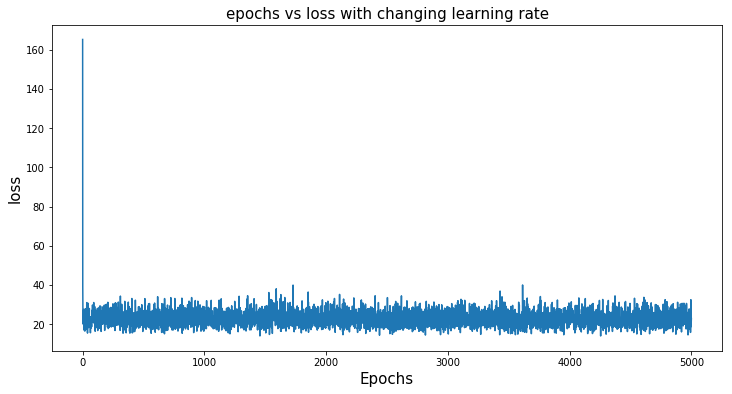

In [13]:
weights_vlr = Weights#value of weight vector at the end of 5000th epoch
Coeff_vlr = Coeff
print('Weights for learning rate changing with every epoch are:',Weights)
print('Constant term for learning rate changing with every epoch is:',Coeff)

%matplotlib inline

#plotting the epochs vs loss 
plt.figure(figsize = (12,6))
plt.plot([i for i in range(0,n_epochs)],ep_loss)
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('loss',fontsize = 15)
plt.title('epochs vs loss with changing learning rate',fontsize = 15)

Y_hat = ((Weights.T).dot(X_test.T) + Coeff ).reshape(102,1)#computing the predicted values on test data
Y_test = np.array(Y_test)
mse_sgd = mean_squared_error(Y_test,Y_hat)#computing the mean squared error
print('mean_squared_error after implementing sgd manually with changing leaarning rate is :',mse_sgd)


## 1.2.2 Constant learning rate with each epoch

In [14]:
Weights = np.random.randn(X_train.shape[1],1)#initializing the weights
Coeff = np.random.randn(1,1)#initializing the coefficient values

n_epochs = 5000#number of times we want all of the data to be given as input
m = X_train.shape[0]#total number of data points in the training data 
ep_loss = [] #list for loss at the end of each epoch
lr = 1 #learning rate

for ep in range(1,n_epochs+1):
    loss = 0 #the mean squred error 
    
    
    for i in range(m):
        #here we are looping over the total number of data points once,for completion of one epoch
        
        b = np.random.randint(0,m)#the batch size ,as we want one random data point per iteration
        
        #reshaping the one training sample and corresponding y
        X = X_train[b,:].reshape(1,X_train.shape[1])
        Y = Y_train[b].reshape(1,1)
        
        
        Y_pred = np.dot(X,Weights) + Coeff #finding the predicted values on training data
        loss = loss + (Y_pred - Y)**2 #computing the sum of mean squared errors in every iteration
        
        
        Weights = Weights - (2/m)*(lr)*(X.T.dot(Y_pred - Y))#updating the weights
        Coeff = Coeff - (2/m)*(lr)*(Y_pred - Y) #updating the bias term
        
    #lr = lr/2
        
        
    ep_loss.append(loss[0][0]/m)


Weights for learning rate changing with every epoch are: [[-0.9872763 ]
 [ 0.85009917]
 [ 0.06636749]
 [ 0.87204787]
 [-2.11683567]
 [ 3.15769378]
 [-0.52586822]
 [-3.37107063]
 [ 2.55775089]
 [-1.71615317]
 [-1.83617658]
 [ 0.72633639]
 [-3.26997752]]
Constant term for learning rate changing with every epoch is: [[ 23.21874236]]
mean_squared_error after implementing sgd manually with constant learning rate is : 22.8566063721


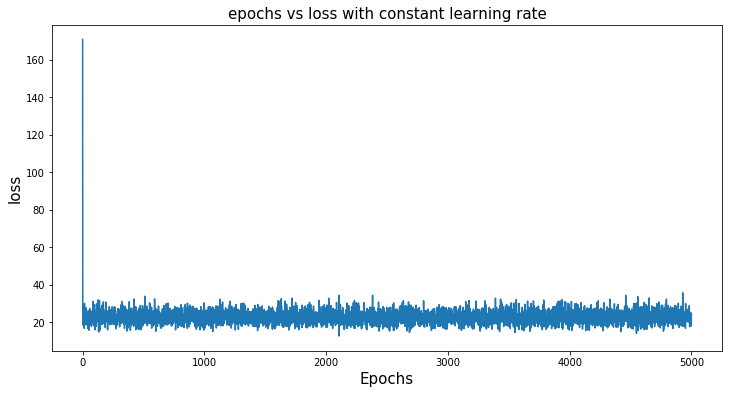

In [16]:
weights_c = Weights#value of weight vector at the end of 5000th epoch
Coeff_c = Coeff
print('Weights for learning rate changing with every epoch are:',Weights)
print('Constant term for learning rate changing with every epoch is:',Coeff)

%matplotlib inline

#plotting the epochs vs loss 
plt.figure(figsize = (12,6))
plt.plot([i for i in range(0,n_epochs)],ep_loss)
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('loss',fontsize = 15)
plt.title('epochs vs loss with constant learning rate',fontsize = 15)

Y_hat_c = ((Weights.T).dot(X_test.T) + Coeff ).reshape(102,1)#computing the predicted values on test data
Y_test = np.array(Y_test)
mse_sgd_c = mean_squared_error(Y_test,Y_hat_c)#computing the mean squared error
print('mean_squared_error after implementing sgd manually with constant learning rate is :',mse_sgd_c)


We see that the loss converges very fast between 0 to 10 number of epochs and then it oscillates between a certain minimum and maximum ,as the function is trying to find a global minima for convergence.

# Comparison between Sklearn and Manual Implementation

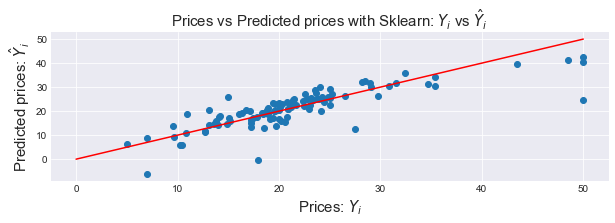

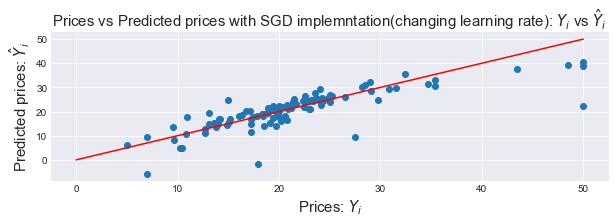

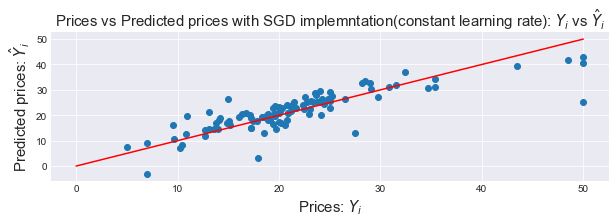

In [17]:
import seaborn as sns


sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
plt.subplot(211)
plt.scatter(Y_test,Y_hat_skl)
plt.plot(np.linspace(0,50,10),np.linspace(0,50,10),'r')
plt.xlabel("Prices: $Y_i$",fontsize = 15)
plt.ylabel("Predicted prices: $\hat{Y}_i$",fontsize = 15)
plt.title("Prices vs Predicted prices with Sklearn implementation: $Y_i$ vs $\hat{Y}_i$",fontsize = 15)
#plt.show()


plt.figure(figsize = (10,6))
plt.subplot(212)
plt.scatter(Y_test,Y_hat)
plt.plot(np.linspace(0,50,10),np.linspace(0,50,10),'r')
plt.xlabel("Prices: $Y_i$",fontsize = 15)
plt.ylabel("Predicted prices: $\hat{Y}_i$",fontsize = 15)
plt.title("Prices vs Predicted prices with SGD implementation(changing learning rate): $Y_i$ vs $\hat{Y}_i$",fontsize = 15)
plt.show()


plt.figure(figsize = (10,6))
plt.subplot(212)
plt.scatter(Y_test,Y_hat_c)
plt.plot(np.linspace(0,50,10),np.linspace(0,50,10),'r')
plt.xlabel("Prices: $Y_i$",fontsize = 15)
plt.ylabel("Predicted prices: $\hat{Y}_i$",fontsize = 15)
plt.title("Prices vs Predicted prices with SGD implementation(constant learning rate): $Y_i$ vs $\hat{Y}_i$",fontsize = 15)
plt.show()



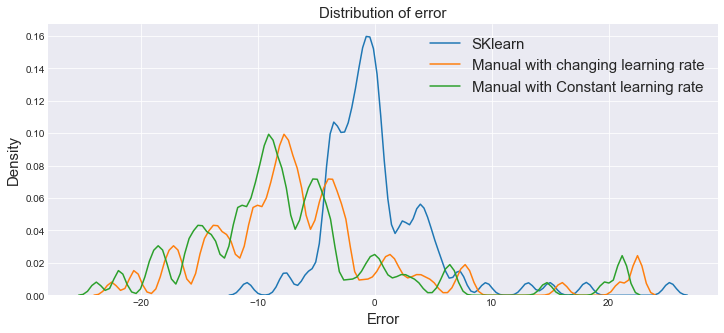

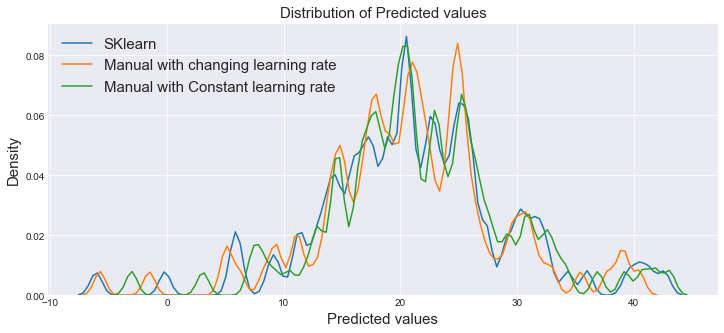

In [54]:
"""WE will plot the kernel density estimation plots of error and predicted values"""

#differenc between actual and predicted values for all three cases
delta_y1 = Y_test - Y_hat_skl #sklearn
delta_y2 = np.asmatrix(Y_test) - Y_hat #changing learning rate
delta_y3 = np.asmatrix(Y_test) - Y_hat_c #constant learning rate

sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
sns.kdeplot(np.array(delta_y1), bw=0.5,label = 'SKlearn')
sns.kdeplot(np.asarray(delta_y2)[0], bw=0.5,label = 'Manual with changing learning rate')
sns.kdeplot(np.asarray(delta_y3)[0], bw=0.5,label = 'Manual with Constant learning rate')
plt.title('Distribution of error',fontsize = 15)
plt.xlabel('Error',fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.legend(loc = 'best',fontsize = 15)
plt.show()



#distribution density of predicted values

plt.figure(figsize = (12,5))
sns.kdeplot(np.asarray(Y_hat_skl), bw=0.5,label = 'SKlearn')
sns.kdeplot(np.asarray(Y_hat).T[0], bw=0.5,label = 'Manual with changing learning rate')
sns.kdeplot(np.asarray(Y_hat_c).T[0], bw=0.5,label = 'Manual with Constant learning rate')
plt.title('Distribution of Predicted values',fontsize = 15)
plt.xlabel('Predicted values',fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.legend(loc = 'best',fontsize = 15)
plt.show()





- The distribution of error for Manual implemetation with changing learning rate has more variance than one with constant learning rate which can be understood with non constant lr.

- 

In [76]:
# Comparing the final weights for each of the three implenetations
weights_dict = {'SKlearn_implementation':lr_model.coef_,'Manual with Changing lr':np.array(weights_vlr).T[0],
                'Manual with constant LR':np.array(weights_c).T[0]}
Weights_df = pd.DataFrame(weights_dict,index = None)
Weights_df

,SKlearn_implementation,Manual with Changing lr,Manual with constant LR
0,-0.997011,-0.784548,-0.987276
1,0.695117,0.346827,0.850099
2,0.281520,-0.036585,0.066367
3,0.717662,1.042431,0.872048
4,-2.026188,-0.977779,-2.116836
5,3.141030,3.502265,3.157694
6,-0.172170,-0.218942,-0.525868
7,-3.085071,-1.785345,-3.371071
8,2.248803,1.046697,2.557751
9,-1.760011,-1.249237,-1.716153


In [78]:
print('MSE with SKlearn: ',mse_sklearn)
print('MSE with Manual Implementation with Changing lr:',mse_sgd)
print('MSE with Manual Implemetation with Constant lr:',mse_sgd_c)

MSE with SKlearn:  24.3033972171
MSE with Manual Implementation with Changing lr: 26.6180348135
MSE with Manual Implemetation with Constant lr: 22.8566063721


# Conclusion:

- We get the best Mean Squared Error value with manual implementation of SGD keeping the learning rate constant for every epoch.

- The Sklearn implementation fared well than manual sgd where we changed the learning rate with every epoch.This can be attributed to the regularization terms which were used for avoiding overfitting in the data.

- Though None of the above model is good enough for prediction of regression values 

